In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


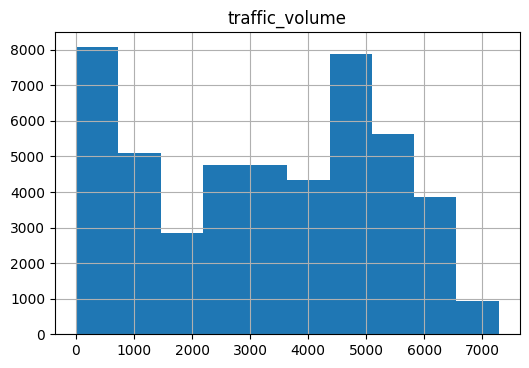

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [5]:
df.hist('traffic_volume')
plt.show()

df['traffic_volume'].describe()

* About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
* About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

The reason behind this variation in the traffic volumes might be the caused by the date timing, so deviding the data into two parts (daytime, nighttime) might gives the data an intersting direction, wich is a comparison between daytime and nighttime data.


In [8]:
df['date_time'] = pd.to_datetime(df['date_time'])

daytime_data = df[(df['date_time'].dt.hour >= 7) & (df['date_time'].dt.hour < 19)]
night_data = df[(df['date_time'].dt.hour >= 19) | (df['date_time'].dt.hour < 7)]

Text(0, 0.5, 'Frequency')

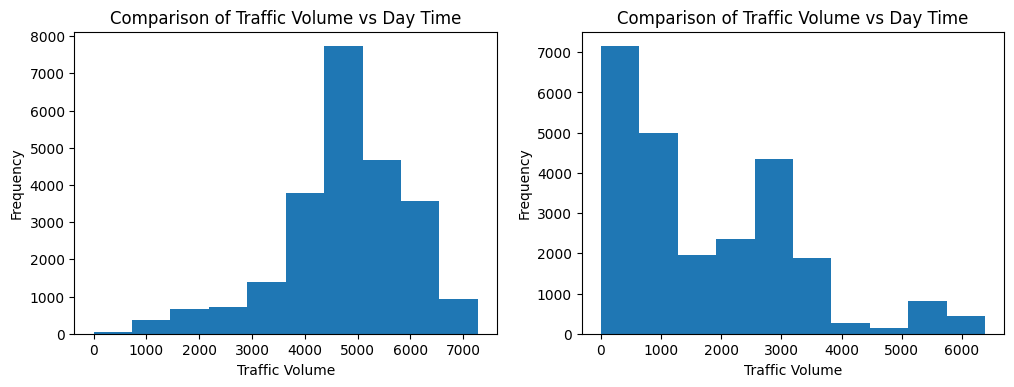

In [10]:
# Visualising day and night time data

plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.hist(daytime_data['traffic_volume'])
plt.title('Comparison of Traffic Volume vs Day Time')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(night_data['traffic_volume'])
plt.title('Comparison of Traffic Volume vs Day Time')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

In [12]:
daytime_data['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [15]:
night_data['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

* According to the grid above, the traffic volume tends to increase in the day time gradually, until it reaches the peak, then it starts to decrease again. Meanwhile, traffic volume tends to decrease during the night hours.

* Day time freaquency is almost 4 times the night time.

The goal is to find the indicators of heavy traffic, so it is better to only focus on the daytime data moving forward.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day. The following parameters will help to look at a few line plots showing how the traffic volume changed according:

* Month
* Day of the week
* Time of day

In [16]:
# Comparing month data

daytime_data['month'] = daytime_data['date_time'].dt.month
by_month = daytime_data.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-16-acc0784dbb12>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

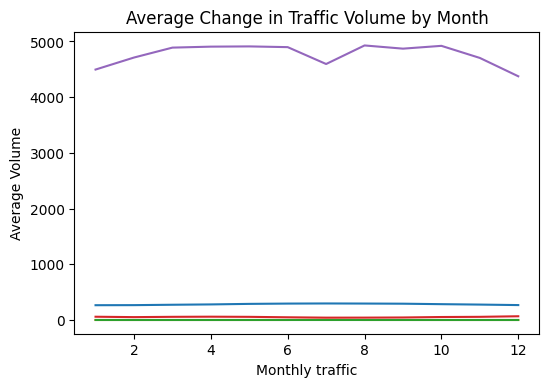

In [17]:
plt.plot(by_month)
plt.title('Average Change in Traffic Volume by Month')
plt.xlabel('Monthly traffic')
plt.ylabel('Average Volume')
plt.show()

In [18]:
# Comparing by day

daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek
by_day = daytime_data.groupby('dayofweek').mean()
by_day['traffic_volume']

<ipython-input-18-f3c070a0ea69>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

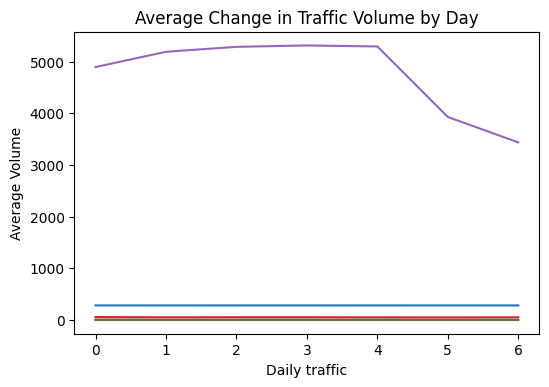

In [19]:
plt.plot(by_day)
plt.title('Average Change in Traffic Volume by Day')
plt.xlabel('Daily traffic')
plt.ylabel('Average Volume')
plt.show()

In [20]:
# By hour

daytime_data['hour'] = daytime_data['date_time'].dt.hour
business_days = daytime_data.copy()[daytime_data['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_data.copy()[daytime_data['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


<ipython-input-20-a0a9ee024245>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



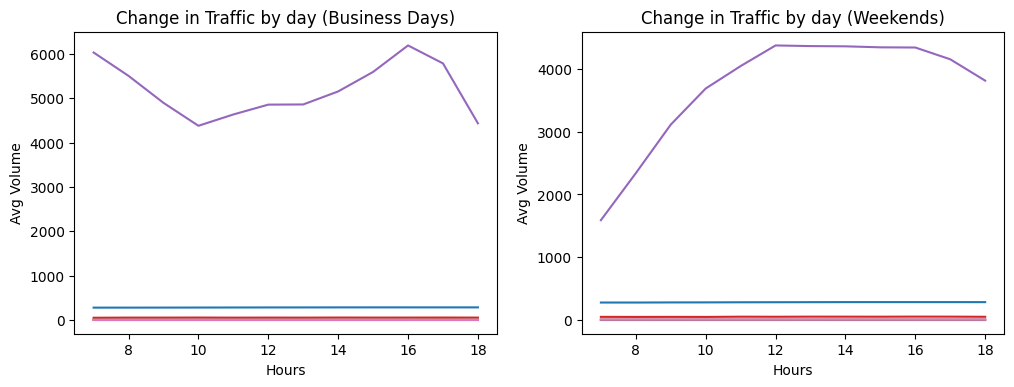

In [21]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(by_hour_business)
plt.title('Change in Traffic by day (Business Days)')
plt.xlabel('Hours')
plt.ylabel('Avg Volume')

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend)
plt.title('Change in Traffic by day (Weekends)')
plt.xlabel('Hours')
plt.ylabel('Avg Volume')

plt.show()

In [22]:
# Checking Weather

daytime_data.corr()['traffic_volume']


temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

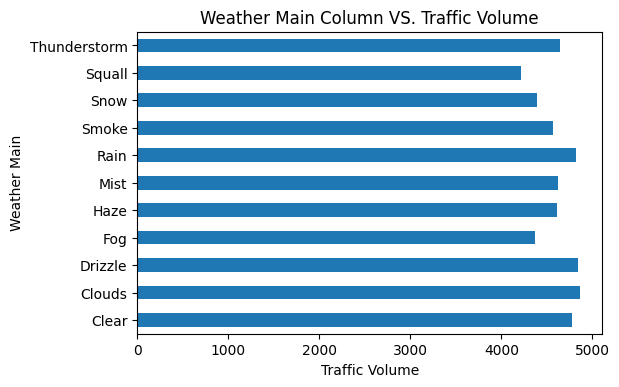

In [23]:
#calculating the average traffic volume:

by_weather_main = daytime_data.groupby('weather_main').mean()
by_weather_description = daytime_data.groupby('weather_description').mean()

#creating a bar plot for the traffic_volume column of by_weather_main

by_weather_main['traffic_volume'].plot.barh()
plt.title('Weather Main Column VS. Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Main')
plt.show()

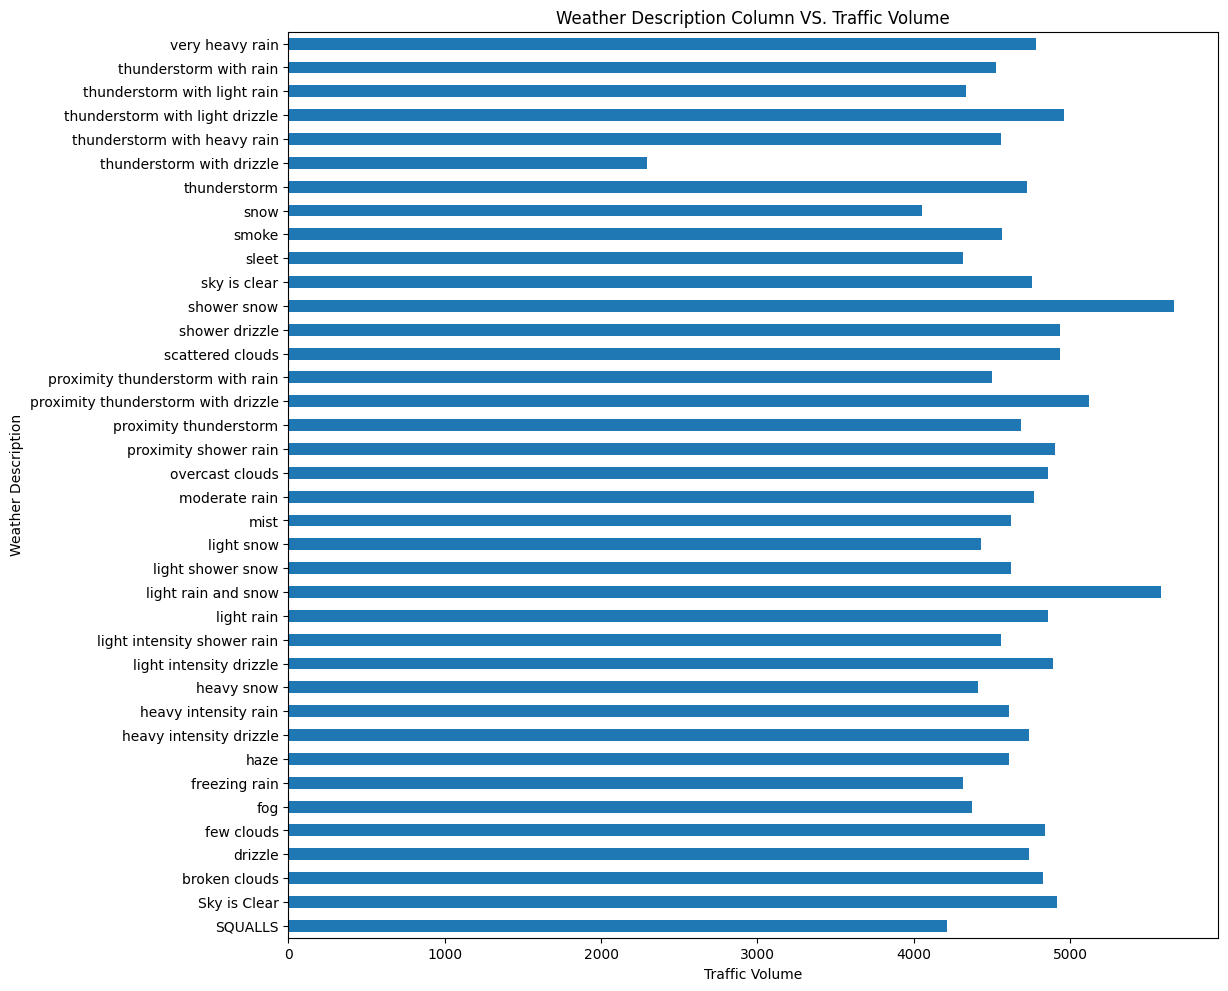

In [24]:
#creating a bar plot for the traffic_volume column of by_weather_description

plt.figure(figsize=(12,12))
by_weather_description['traffic_volume'].plot.barh()
plt.title('Weather Description Column VS. Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')
plt.show()

## Conclusion

Conclusion:
* Traffic Volume is heavier during the warm months (March - October), and lighter during the cold months (November - February).
* Traffic volume is significantly heavier on business days compared to weekends.
* Traffic volume tends to increase in working days at the time employees go to and from their work, while in weekends it is generally low, but it increases during the day.
* Generally, traffic volume is less than 5,000 in different weather types, except for (shower snow, light rain and proximity thunderstorm with drizzle), it exceeds 5,000.